## 1. Tổng quan đồ án

Đột quỵ não đã trở thành một vấn đề sức khỏe cộng đồng quan trọng trên toàn cầu trong những năm gần đây. Giải pháp lý tưởng để giải quyết vấn đề này là phòng ngừa từ trước bằng cách kiểm soát các yếu tố chuyển hóa liên quan. Tuy nhiên, việc quyết định liệu có cần các biện pháp phòng ngừa đặc biệt cho một bệnh nhân tiềm năng chỉ dựa trên việc theo dõi các chỉ số sinh lý là rất khó khăn, trừ khi chúng rõ ràng bất thường. Dự án này sẽ áp dụng các kĩ thuật trong học máy để dự đoán đột quỵ não cho chẩn đoán lâm sàng.

## 2. Xác định phạm vi đồ án

Bộ dữ liệu được sử dụng trong đồ án này được thu thập từ Kaggle. Biến phụ thuộc là 'stroke', là biến binary với 2 giá trị, 0 cho không bị đột quỵ và 1 là bị đột quỵ. Bộ dữ liệu có mức độ không cân bằng lớn, 783 trường hợp đột quỵ được bao gồm trong tổng số 43,400 mẫu đã ghi nhận, chỉ chiếm 1.18% tổng số mẫu. Các biến độc lập gồm 10 đặc trưng bao gồm các chỉ số sinh lý, như tuổi, huyết áp và đường huyết,... Bộ dữ liệu này bị thiếu thông tin, với 30% số quan sát ở biến 'smoking_status' và 3% số quan sát ở biến 'BMI' bị thiếu. Để giải quyết vấn đề mất cân bằng dữ liệu cũng như thiếu thiếu dữ liệu này, các phương pháp khác nhau sẽ được áp dụng trong quá trình tiền xử lý.

Cụ thể, trong đồ án này tôi sẽ thực hiện những việc sau:
1. Tìm hiểu về tập dữ liệu
2. Tiền xử lý dữ liệu
3. Đánh giá và lựa chọn đặc trưng
4. Đánh giá và lựa chọn mô hình
5. Cải thiện thuật toán
6. Đánh giá và kiểm định chất lượng
7. Thảo luận
8. Tổng kết
9. Cải thiện

## 3. Các chỉ số

Dựa theo tham khảo từ một bài nghiên cứu có liên quan thì các chẩn đoán về y tế nên được ưu tiên về các chỉ số **False Negative Rate (FNR)** và **False Postive Rate (FPR)**, đặc biệt là cho chẩn đoán đột quỵ.

FNR có thể đặt bệnh nhân vào nguy hiểm khi không nhận được điều trị kịp thời và phù hợp do bệnh không được chẩn đoán, trong khi FPR có thể dẫn đến các xét nghiệm bổ sung tốn kém và điều trị y tế không cần thiết. Đây là lý do tại sao việc giảm thiểu cả FPR và FNR là rất quan trọng. Do đó, việc làm thế nào để giảm FPR và FNR là trọng tâm quan trọng nhất của đồ án này.

Để tối thiểu hóa FNR và FPR thì chúng ta cần có một chỉ số tương xứng để làm chỉ số đánh giá trong việc lựa chọn đặc trưng cũng như mô hình phù hợp nhất. Theo đó thì đồ án sẽ sử dụng **Geometric_mean_score** làm chỉ số đánh giá chính trong việc lựa chọn đặc trưng, đánh giá và cải thiện mô hình.

Mô hình cuối cùng cũng sẽ được đánh giá thêm bằng các metrics trên cộng với Recall và Accuracy để có thể đánh giá một cách chi tiết, và dùng những kết quả này so sánh với một nghiên cứu trước đó.

## 4. Tìm hiểu về tập dữ liệu

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('dataset.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [5]:
df.gender.value_counts()

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

In [6]:
df.hypertension.value_counts()

hypertension
0    39339
1     4061
Name: count, dtype: int64

In [7]:
df.heart_disease.value_counts()

heart_disease
0    41338
1     2062
Name: count, dtype: int64

In [8]:
df.ever_married.value_counts()

ever_married
Yes    27938
No     15462
Name: count, dtype: int64

In [9]:
df.work_type.value_counts()

work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64

In [10]:
df.Residence_type.value_counts()

Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64

In [11]:
df.smoking_status.value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [12]:
df.stroke.value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

In [13]:
df.age.describe()

count    43400.000000
mean        42.217894
std         22.519649
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

In [14]:
df.avg_glucose_level.describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: avg_glucose_level, dtype: float64

In [15]:
df.bmi.describe()

count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: bmi, dtype: float64

Bộ dataset có 43,400 quan sát và 12 biến, trong đó 1 biến mục tiêu và 10 biến phụ thuộc. Trong đó biến mục tiêu là 'stroke' với các giá trị 1 cho người từng bị đột quỵ và 0 cho người không bị. Các biến còn lại bao gồm các biến hạng mục bao gồm: giới tính, huyết áp cao, bệnh tim, đã kết hôn, loại công việc, loại cư dân và trạng thái hút thuốc. Còn lại các biến số bao gồm tuổi tác, mức đường huyết trong máu và chỉ số cân nặng - chiều cao bmi.

In [16]:
(df.stroke.value_counts()/len(df)*100).round(2).astype(str)+'%'

stroke
0    98.2%
1     1.8%
Name: count, dtype: object

Ta thấy biến mục tiêu là 'stroke' bị chênh lệch rất lơn giữa hai lớp, trong đó số lượng người bị đột quỵ là 783 người, chỉ chiếm 1.8%.

In [17]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [18]:
(df.isnull().sum()/len(df)*100).round(2).astype(str)+'%'

id                     0.0%
gender                 0.0%
age                    0.0%
hypertension           0.0%
heart_disease          0.0%
ever_married           0.0%
work_type              0.0%
Residence_type         0.0%
avg_glucose_level      0.0%
bmi                   3.37%
smoking_status       30.63%
stroke                 0.0%
dtype: object

Như đã đề cập thì tập dataset có 2 đặc trưng bị thiếu dữ liệu là smoking_status và bmi. Trong đó biến bmi bị thiếu khá ít (3.37%) trong khi biến smoking_status bị thiếu tương đối nhiều (30.36%).

## 5. Tiền xử lý dữ liệu

### 5.1. Loại bỏ ngoại lai và dữ liệu nhiễu

In [19]:
df=df[df.age>=25]

In [20]:
df=df[~(df.bmi>60)]

In [21]:
df.drop('id', axis=1, inplace=True)

Bộ dữ liệu này chứa một số giá trị ngoại lai và nhiễu rõ ràng, chẳng hạn như các mục về tuổi và BMI. Theo các phương pháp và tiêu chuẩn từ MONICA (Multinational Monitoring of Trends and Determinants in Cardiovascular Disease), độ tuổi tối thiểu để giám sát đột quỵ phải là 25. Tuy nhiên, một số mẫu dưới 25 tuổi cũng được đưa vào dữ liệu, thậm chí có trường hợp trẻ sơ sinh chỉ 0,08 tuổi.

Giá trị tham chiếu của chỉ số BMI thường nằm trong khoảng 10 đến 50, nhưng một số mẫu với giá trị BMI từ 60 đến 97,6 cũng được bao gồm trong tập dữ liệu thu thập. Do đó, những dữ liệu như vậy (tuổi dưới 25 và BMI trên 60) nên được loại bỏ vì là ngoại lai và nhiễu.

Id bệnh nhân là một đặc trưng dư thừa rõ ràng, những đặc điểm như vậy nên được loại bỏ trực tiếp.

### 5.1. Xử lý đặc trưng bị thiếu

In [22]:
df.shape

(32263, 11)

In [23]:
df.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1290
smoking_status       6257
stroke                  0
dtype: int64

In [24]:
(df.isnull().sum()/len(df)*100).round(2).astype(str)+'%'

gender                 0.0%
age                    0.0%
hypertension           0.0%
heart_disease          0.0%
ever_married           0.0%
work_type              0.0%
Residence_type         0.0%
avg_glucose_level      0.0%
bmi                    4.0%
smoking_status       19.39%
stroke                 0.0%
dtype: object

<Axes: >

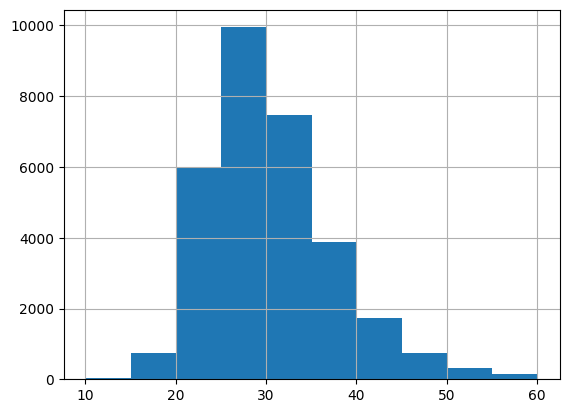

In [25]:
df.bmi.hist()

Sau khi loại bỏ các ngoại lai và nhiễu thì bộ dữ liệu còn lại 32,263 quan sát, trong đó bmi thiếu 4% và smoking_status thiếu gần 20%.

Đối với bmi, từ biểu đồ histogram ta thấy dữ liệu không được phân phối chuẩn, do đó chúng ta sử dụng median để gán cho các giá trị bị thiếu của biến 'bmi'
Đối với biến 'smoking_status', số lượng giá trị bị thiếu là không quá cao, tuy nhiên nếu dùng các phương pháp đơn giản như gán bằng mode, random, arbitrary hay end of tail imputation thì có thể làm ảnh hưởng đến phân phối của biến.

Smoking_status là trường hợp thiếu dữ liệu hoàn toàn ngẫu nhiên, do nó không liên quan tới các biến khác cũng như mang lại bất kì ý nghĩa nào. Do đó việc sử dụng CCA (Complete Case Analysis) có thể phù hợp, tuy nhiên điều này sẽ làm mất đi 20% thông tin từ từng đặc trưng khác.

Do đó một phương pháp gán dữ liệu phức tạp hơn cần được thực hiện, gán giá trị bị thiếu bằng các mô hình học máy như RandomForest hoặc KNN để khai thác thông tin từ các đặc trưng khác có thể là một phương pháp phù hợp, tuy nhiên trước tiên, tôi muốn kiếm tra mức độ quan trọng của smoking_status.

In [26]:
# gán median cho bmi và tạm thời gán mode cho smoking_status
df.fillna({'bmi':df.bmi.median(), 'smoking_status':df.smoking_status.mode()[0]}, inplace=True)

In [27]:
y=df.stroke

In [28]:
X=df.drop('stroke', axis=1)

In [29]:
X=pd.get_dummies(X, drop_first=True)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer

In [32]:
from matplotlib import pyplot as plt

In [33]:
g_mean=make_scorer(geometric_mean_score)

In [34]:
model=RandomForestClassifier(random_state=0, class_weight='balanced')
params={'max_depth':np.arange(1,10)}
gsc=GridSearchCV(estimator=model, param_grid=params, scoring=g_mean)

In [35]:
gsc.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring=make_scorer(geometric_mean_score, response_method='predict'))

In [36]:
feature_importances=gsc.best_estimator_.feature_importances_

<BarContainer object of 14 artists>

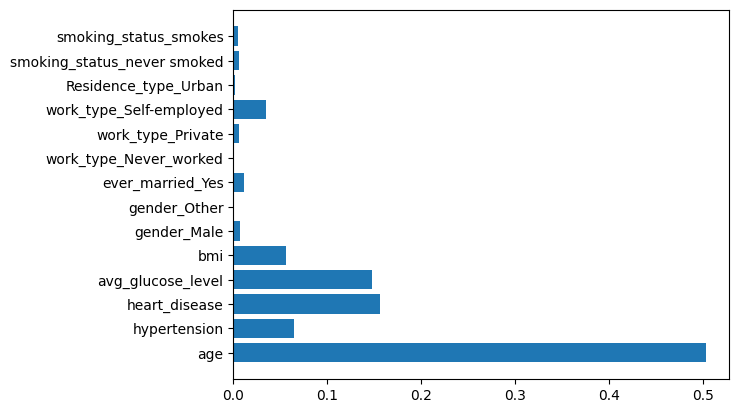

In [37]:
plt.barh(X.columns, feature_importances)

Theo mức độ quan trọng của từng đặc trưng, smoking_status cho kết quả gần như thấp nhất. Điều này cho thấy chúng ta không cần phải sử dụng thêm các kĩ thuật phức tạp để gán giá trị bị thiếu cho smoking_status.

### 5.1. Xử lý biến dữ liệu số thật ra là biến hạng mục

In [38]:
y=df.stroke

In [39]:
X=df.drop('stroke', axis=1)

In [40]:
X.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

Trong các đặc trưng thì 'hypertension' và 'heart_diease' là hai biến hạng mục nhưng lại mang giá trị số, do đó cần chuyển chúng về dạng dữ liệu 'str' để tránh gây nhầm lẫn.

In [41]:
X[['hypertension','heart_disease']]=X[['hypertension', 'heart_disease']].astype(str)

In [42]:
X.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

### 5.2. Mã hóa One-hot (One-hot encoding) biến hạng mục

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)

In [45]:
cat_cols=[column for column in X_train if X_train[column].dtype=='O']

In [46]:
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [47]:
num_cols=[column for column in X_train if column not in cat_cols]

In [48]:
num_cols

['age', 'avg_glucose_level', 'bmi']

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
ohe=OneHotEncoder(drop='if_binary')
cat_train=ohe.fit_transform(X_train[cat_cols])
cat_test=ohe.transform(X_test[cat_cols])

In [51]:
col_names=ohe.get_feature_names_out(input_features=cat_cols)

In [52]:
col_names

array(['gender_Female', 'gender_Male', 'gender_Other', 'hypertension_1',
       'heart_disease_1', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'], dtype=object)

In [53]:
train_encoded=pd.DataFrame(cat_train.todense(), columns=col_names)
test_encoded=pd.DataFrame(cat_test.todense(), columns=col_names)

### 5.3. Co dãn dữ liệu số

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler=StandardScaler()
num_train=scaler.fit_transform(X_train[num_cols])
num_test=scaler.transform(X_test[num_cols])

In [56]:
train_scaled=pd.DataFrame(num_train, columns=num_cols)
test_scaled=pd.DataFrame(num_test, columns=num_cols)

In [57]:
X_train=pd.concat([train_encoded, train_scaled], axis=1)
X_test=pd.concat([test_encoded, test_scaled], axis=1)

## 6. Lựa chọn đặc trưng

In [58]:
model=RandomForestClassifier(class_weight='balanced', random_state=0)
params={'max_depth':np.arange(1,10)}
gsc=GridSearchCV(estimator=model, param_grid=params, scoring=g_mean)

In [59]:
gsc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring=make_scorer(geometric_mean_score, response_method='predict'))

In [60]:
feature_importances=gsc.best_estimator_.feature_importances_

In [61]:
features=X_train.columns

In [62]:
sorted_pairs=sorted(zip(features, feature_importances), key= lambda x: x[1])

In [63]:
features, feature_importances=zip(*sorted_pairs)

<BarContainer object of 17 artists>

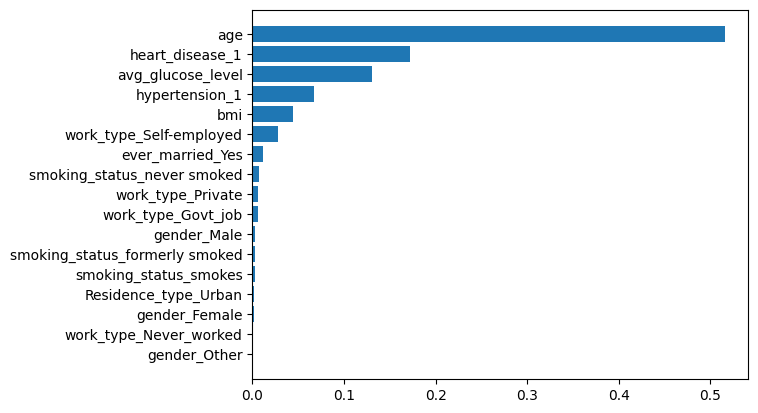

In [64]:
plt.barh(features, feature_importances)

Ta thấy có 6 đặc trưng có mức độ quan trọng đáng kể, lớn nhất là 'age' và thấp nhất là 'work_type_Self-employed'

## 6. Lựa chọn mô hình

### 6.1. Mô hình baseline

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
from sklearn.model_selection import StratifiedKFold

In [68]:
def evaluate_model(model):
    score=cross_val_score(model, X_train, y_train, cv=StratifiedKFold(shuffle=True,random_state=0), scoring=g_mean).mean()
    return score

In [69]:
model=DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=0)

In [70]:
evaluate_model(model)

np.float64(0.7163081671405689)

Mô hình cơ sở có vẻ đang thể hiện khá tốt

In [71]:
model=DecisionTreeClassifier(class_weight='balanced', random_state=0)
params={'ccp_alpha':[0.001, 0.002, 0.003, 0.004, 0.005]}
gsc=GridSearchCV(estimator=model, param_grid=params, scoring=g_mean)

In [72]:
gsc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'ccp_alpha': [0.001, 0.002, 0.003, 0.004, 0.005]},
             scoring=make_scorer(geometric_mean_score, response_method='predict'))

In [73]:
gsc.best_params_

{'ccp_alpha': 0.003}

In [74]:
model=DecisionTreeClassifier(ccp_alpha=gsc.best_params_['ccp_alpha'], class_weight='balanced', random_state=0)

In [75]:
evaluate_model(model)

np.float64(0.7198367210234128)

Sau khi fine tune mô hình bằng cách tìm kiếm tham số ccp_alpha tối ưu, mô hình đã được cải thiện hơn nhưng không đáng kể

### 6.1. Đánh giá và lựa chọn mô hình

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
from sklearn.linear_model import RidgeClassifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
from xgboost import XGBClassifier

In [81]:
from sklearn.ensemble import StackingClassifier

In [82]:
model=RidgeClassifier(random_state=0, class_weight='balanced')
params={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 20]}
gsc=GridSearchCV(estimator=model, param_grid=params, scoring=g_mean)

In [83]:
gsc.fit(X_train, y_train)

GridSearchCV(estimator=RidgeClassifier(class_weight='balanced', random_state=0),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20]},
             scoring=make_scorer(geometric_mean_score, response_method='predict'))

In [84]:
gsc.best_params_

{'alpha': 0.0001}

In [85]:
model=RidgeClassifier(alpha=gsc.best_params_['alpha'], class_weight='balanced', random_state=0)

In [86]:
evaluate_model(model)

np.float64(0.7367580979292162)

RidgeClassifier cho kết quả tốt hơn baseline gần 1.7%

In [87]:
model=RandomForestClassifier(random_state=0, class_weight='balanced')
params={'max_depth':[1, 2, 3, 4, 5]}
gsc=GridSearchCV(estimator=model, param_grid=params, scoring=g_mean)

In [88]:
gsc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5]},
             scoring=make_scorer(geometric_mean_score, response_method='predict'))

In [89]:
gsc.best_params_

{'max_depth': 3}

In [90]:
model=RandomForestClassifier(max_depth=gsc.best_params_['max_depth'], class_weight='balanced', random_state=0)

In [91]:
evaluate_model(model)

np.float64(0.736800250115415)

RandomForestClassifier cho kết quả gần như tương tự RidgeClassifier

In [92]:
base_model=DecisionTreeClassifier(class_weight='balanced', random_state=0)
model=AdaBoostClassifier(estimator=base_model, random_state=0)
params={'estimator__max_depth':[1, 2, 3]}
gsc=GridSearchCV(estimator=model, param_grid=params, scoring=g_mean)

In [93]:
gsc.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                           random_state=0),
                                          random_state=0),
             param_grid={'estimator__max_depth': [1, 2, 3]},
             scoring=make_scorer(geometric_mean_score, response_method='predict'))

In [94]:
gsc.best_params_

{'estimator__max_depth': 1}

In [95]:
base_model=DecisionTreeClassifier(max_depth=gsc.best_params_['estimator__max_depth'],class_weight='balanced', random_state=0)
model=AdaBoostClassifier(estimator=base_model, random_state=0)

In [96]:
evaluate_model(model)

np.float64(0.7152470749363753)

AdaBoost cũng cho kết quả gần như tương tự Ridge và RandomForest

In [97]:
y_train.value_counts()[1]

np.int64(624)

In [98]:
model=XGBClassifier(random_state=0, scale_pos_weight=33)
params={'max_depth':[1, 2, 3, 4, 5]}
gsc=GridSearchCV(estimator=model, param_grid=params, scoring=g_mean)

In [99]:
gsc.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lea..._bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'max_depth': [1, 2, 3, 4, 5]},
             scoring=make_scorer(geometric_mean_score, response_method='predict'))

In [100]:
gsc.best_params_

{'max_depth': 1}

In [101]:
model=XGBClassifier(max_depth=gsc.best_params_['max_depth'], scale_pos_weight=33, random_state=0)

In [102]:
evaluate_model(model)

np.float64(0.7419897309457917)

Cho tới hiện tại XGBoost đang cho kết quả tốt nhất trong số

In [103]:
base_models=[
    # ('LR', LogisticRegression(random_state=0, class_weight='balanced', C=0.01)),
              ('XGB', XGBClassifier(max_depth=1, scale_pos_weight=33, random_state=0)),
            # ('HGBC', HistGradientBoostingClassifier(max_depth=1, class_weight='balanced', random_state=0)),
              # ('AdaBoost',AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=0, max_depth=1, class_weight='balanced'))),
                # ('LGBG', LGBMClassifier(max_depth=1, class_weight='balanced', random_state=0)),
             # ('SVC', SVC(random_state=0, kernel='rbf', class_weight='balanced', C=10 )),
              # ('RFR', RandomForestClassifier(random_state=0, class_weight='balanced', max_depth=1, n_estimators=100)),
             ('Ridge', RidgeClassifier(random_state=0))]

In [104]:
final_model=LogisticRegression(random_state=0, class_weight='balanced')

In [105]:
model=StackingClassifier(stack_method='auto', estimators=base_models, final_estimator=final_model, cv=StratifiedKFold(random_state=0, shuffle=True))

In [106]:
evaluate_model(model)

np.float64(0.7489543022728393)

In [107]:
params={'final_estimator__C':[0.0001, 0.001, 0., 0.1, 1, 10]}

In [108]:
gsc=GridSearchCV(estimator=model, param_grid=params, scoring=g_mean)

In [109]:
gsc.fit(X_train, y_train)

/venv/main/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/venv/main/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/venv/main/lib/python3.10/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/venv/main/lib/python3.10/site-packages/sklearn/ensemble/_stacking.py", line 717, in fit
    return super().fit(X, y_encoded, **fit_params)
  File "/venv/main/lib/python3.10/site-pac

GridSearchCV(estimator=StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                                          estimators=[('XGB',
                                                       XGBClassifier(base_score=None,
                                                                     booster=None,
                                                                     callbacks=None,
                                                                     colsample_bylevel=None,
                                                                     colsample_bynode=None,
                                                                     colsample_bytree=None,
                                                                     device=None,
                                                                     early_stopping_rounds=None,
                                                                     enable_categorical=False,
                                                                     eval_metric=None,
                                                                     feature_types=None,
                                                                     featu...
                                                                     monotone_constraints=None,
                                                                     multi_strategy=None,
                                                                     n_estimators=None,
                                                                     n_jobs=None,
                                                                     num_parallel_tree=None, ...)),
                                                      ('Ridge',
                                                       RidgeClassifier(random_state=0))],
                                          final_estimator=LogisticRegression(class_weight='balanced',
                                                                             random_state=0)),
             param_grid={'final_estimator__C': [0.0001, 0.001, 0.0, 0.1, 1,
                                                10]},
             scoring=make_scorer(geometric_mean_score, response_method='predict'))

In [110]:
gsc.best_params_

{'final_estimator__C': 0.1}

In [111]:
base_models=[('XGB', XGBClassifier(max_depth=1, scale_pos_weight=33, random_state=0)),
             ('Ridge', RidgeClassifier(random_state=0))]

In [112]:
final_model=LogisticRegression(random_state=0, class_weight='balanced', C=gsc.best_params_['final_estimator__C'])

In [113]:
model=StackingClassifier(stack_method='auto', estimators=base_models, final_estimator=final_model, cv=StratifiedKFold(random_state=0, shuffle=True))

In [114]:
evaluate_model(model)

np.float64(0.7500460448193175)

In [115]:
model.fit(X_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimators=[('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=N...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=1,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('Ridge', RidgeClassifier(random_state=0))],
                   final_estimator=LogisticRegression(C=0.1,
                                                      class_weight='balanced',
                                                      random_state=0))

In [116]:
model.fit(X_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimators=[('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=N...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=1,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('Ridge', RidgeClassifier(random_state=0))],
                   final_estimator=LogisticRegression(C=0.1,
                                                      class_weight='balanced',
                                                      random_state=0))

In [117]:
y_pred=model.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [119]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
FNR=fn/(fn+tp)
FPR=fp/(fp+tn)
g_mean_score=geometric_mean_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print(f'Average of FNR and FPR: {(FNR+FPR)/2*100:.2f}%')
print(f'FNR: {FNR*100:.2f}%')
print(f'FPR: {FPR*100:.2f}%')
print(f'G_mean: {g_mean_score*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'Accuracy: {accuracy*100:.2f}%')


Average of FNR and FPR: 26.75%
FNR: 26.92%
FPR: 26.58%
G_mean: 73.25%
Recall: 73.08%
Accuracy: 73.41%
